<a href="https://colab.research.google.com/github/walter1358/Notebooks/blob/main/Trabajo_final1_g1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metricas

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import pandas as pd

df_heart = pd.read_csv('sample_data/Heart Attack.csv')
df_heart.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
#Convertimos la variable objetico a entero
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_heart['class'] = le.fit_transform(df_heart['class'])
df_heart.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


El dataset consta de 1319 filas y 9 columnas

No se encuentran valores nulos

Descripción de variables:

*   age: Edad (entero)
*   gender: Género  (entero)
*   impluse: frecuencia cardiaca (entero)
*   pressurehight : Presión alta (entero)
*   pressurelow: Presión baja (entero)
*   glucose : Nivel de glucosa (decimal)
*   kcm : Creatina quinasa MB (decimal)
*   troponin : Nivel de troponina (decimal)
*   class :  Clase objetivo (entero: 0 o 1)


In [5]:
df_heart.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


**Análisis por variable:**

---


*   **Age(edad)**

    La mayoría de los pacientes tiene entre 47 y 65 años, con una edad promedio de 56. Se aprecian valores extremos de 14 y 103 años, la desviación estandar de 13.64 lo que indica una población diversa en términos de edad.

*   **Genero**

    Hay más hombres que mujeres en el dataset (alrededor del 66% son hombres)

*   **Frecuencia cardiaca.**

    En cuanto a la frecuencua cardiaca se tiene una media de 78.33, la mayoria de pacientes tiene una frecuencia cardiaca de entre 64 y 85, con una desviación estandar de 51.63 lo que indica una dispersión alta entre los datos, se presentan valores extremos de 20 y 1111.

*   **Presión arterial sistólica(pressurehight)**

    En cuanto a la presión arterial sistolica se tiene una media de 127.17, con una desviación estandar de 26.12, lo que indica una distribución moderada de los datos, la mayoria de los datos se encuentran entre 110 y 143, con valores extremos de 42 y 223

*   **pressurelow (Presión arterial diastólica)**

    En cuanto a la presión arterial diastólica, la media es de 72.27 y la desviación estándar es de 14.03, lo que representa una dispersión aceptable. Los mayoría de los valores están entre 62 y 81, pero se observan valores extremos que son  38 y 154.

*  **glucose** (Glucosa en sangre)

    En cuanto a la glucosa, se reporta una media de 146.63, con una desviación estándar alta de 74.92, lo que refleja una gran dispersión. La mayoría de los valores está entre 98 y 169.5, sin embargo, se observan valores mínimos de 35 y máximos de 541.

*  **kcm**

    En cuanto a kcm, se tiene una media de 15.27 con una desviación estándar muy alta de 46.33, lo que indica una gran dispersión. Aunque la mayoría de los valores está entre 1.66 y 5.81, existen valores extremos desde 0.321 hasta 300

*  **troponin**

    En cuanto a los niveles de troponina, se tiene una media de 0.36 con una desviación estándar de 1.15, lo que indica una alta dispersión. La mayoría de los valores se encuentra entre 0.006 y 0.0855, pero hay valores extremos como 0.001000 y  10.3


In [6]:
df_heart.isnull().sum()

,0
age,0
gender,0
impluse,0
pressurehight,0
pressurelow,0
glucose,0
kcm,0
troponin,0
class,0


No se observan valores nulos en el dataset

# Valores Nominales

In [ ]:
X = df_heart.drop('class', axis=1)
X.head()

stats_df = pd.DataFrame({
    'Moda': X.mode().iloc[0],  # Primera moda (en caso de múltiples)
    'Mediana': X.median(),
    'Media': X.mean(),
    'Desv. estándar': X.std(),
    'Varianza': X.var(),
    'Rango': X.max() - X.min(),
    'Maximo': X.max(),
    'Minimo': X.min()
})

print(stats_df)

                  Moda  Mediana       Media  Desv. estándar     Varianza  \
age             60.000   58.000   56.191812       13.647315   186.249220   
gender           1.000    1.000    0.659591        0.474027     0.224701   
impluse         60.000   74.000   78.336619       51.630270  2665.684781   
pressurehight  150.000  124.000  127.170584       26.122720   682.396524   
pressurelow     75.000   72.000   72.269143       14.033924   196.951027   
glucose        100.000  116.000  146.634344       74.923045  5613.462621   
kcm            300.000    2.850   15.274306       46.327083  2146.198651   
troponin         0.003    0.014    0.360942        1.154568     1.333026   

                  Rango  Maximo  Minimo  
age              89.000   103.0  14.000  
gender            1.000     1.0   0.000  
impluse        1091.000  1111.0  20.000  
pressurehight   181.000   223.0  42.000  
pressurelow     116.000   154.0  38.000  
glucose         506.000   541.0  35.000  
kcm             299.6

**Según las medidas estadisticas validamos que las siguientes variables tienen un valor nominal alto:**

* impluse         

* glucose

* kcm

## Distribución simétrica

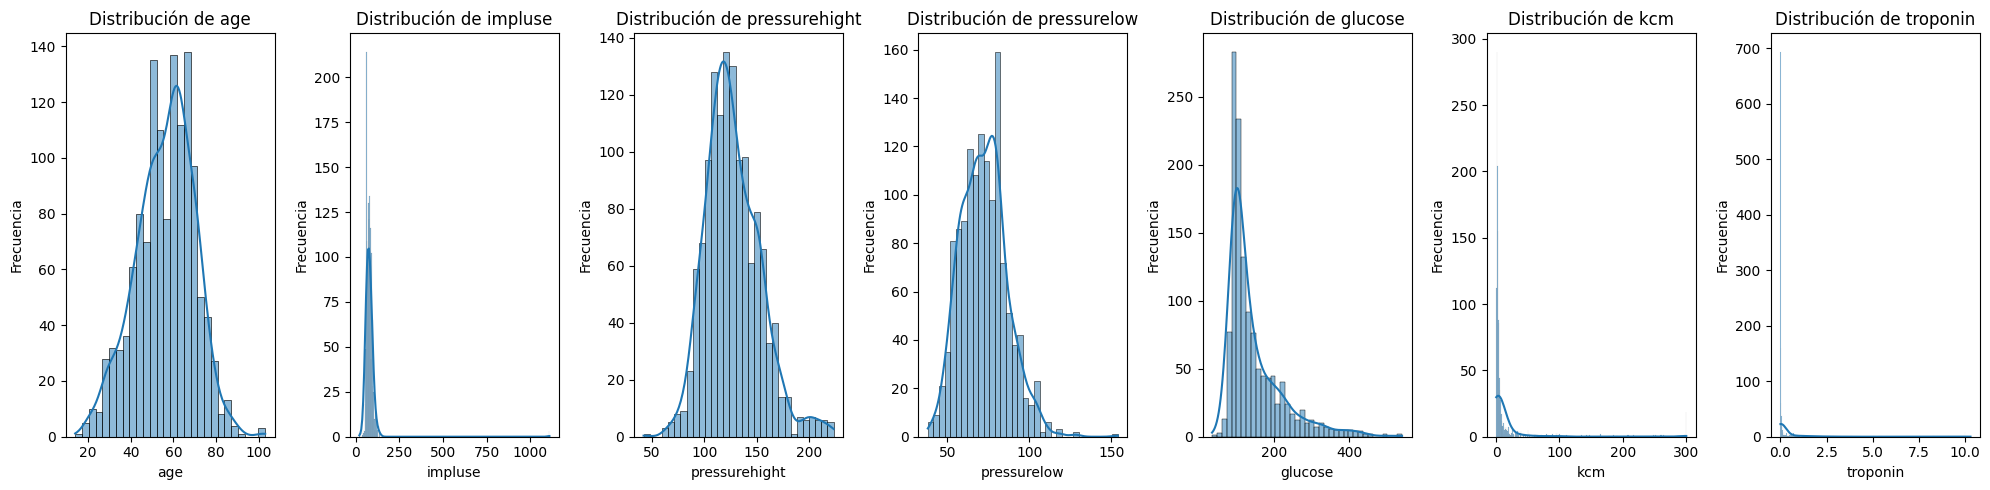

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['age','impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']


fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(20, 5))

# Bucle para generar un histograma por cada columna
for i, col in enumerate(numerical_columns):
    sns.histplot(df_heart[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Visualmente tenemos que:

La variable edad es simétrica

La variable impulse es simétrica

La variable pressurehight no es simétrica

La variable pressurelow es simétrica

La variable glucose no es simétrica

La varaible kcm no es simétrica

La variable troponin no es simétrica

In [ ]:
from scipy.stats import skew

numerical_columns = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

print("Coeficiente de asimetría (skewness):\n")

for col in numerical_columns:
    valor = skew(df_heart[col].dropna())
    interpretacion = ""
    if abs(valor) < 0.5:
        interpretacion = "Distribución aproximadamente simétrica"
    elif valor > 0:
        interpretacion = "Distribución asimétrica positiva (cola a la derecha)"
    else:
        interpretacion = "Distribución asimétrica negativa (cola a la izquierda)"

    print(f"{col}: {valor:.3f} → {interpretacion}")

Coeficiente de asimetría (skewness):

age: -0.239 → Distribución aproximadamente simétrica
impluse: 18.227 → Distribución asimétrica positiva (cola a la derecha)
pressurehight: 0.684 → Distribución asimétrica positiva (cola a la derecha)
pressurelow: 0.489 → Distribución aproximadamente simétrica
glucose: 1.931 → Distribución asimétrica positiva (cola a la derecha)
kcm: 4.972 → Distribución asimétrica positiva (cola a la derecha)
troponin: 5.793 → Distribución asimétrica positiva (cola a la derecha)


Si usamos el coeficiente de asimetria con un umbral de 0.5

age: -0.239 → simétrica

impluse: 18.227 →  asimétrica positiva

pressurehight: 0.684 →  asimétrica positiva

pressurelow: 0.489 → simétrica

glucose: 1.931 →  asimétrica positiva

kcm: 4.972 → Distribución asimétrica positiva

troponin: 5.793 → Distribución asimétrica positiva

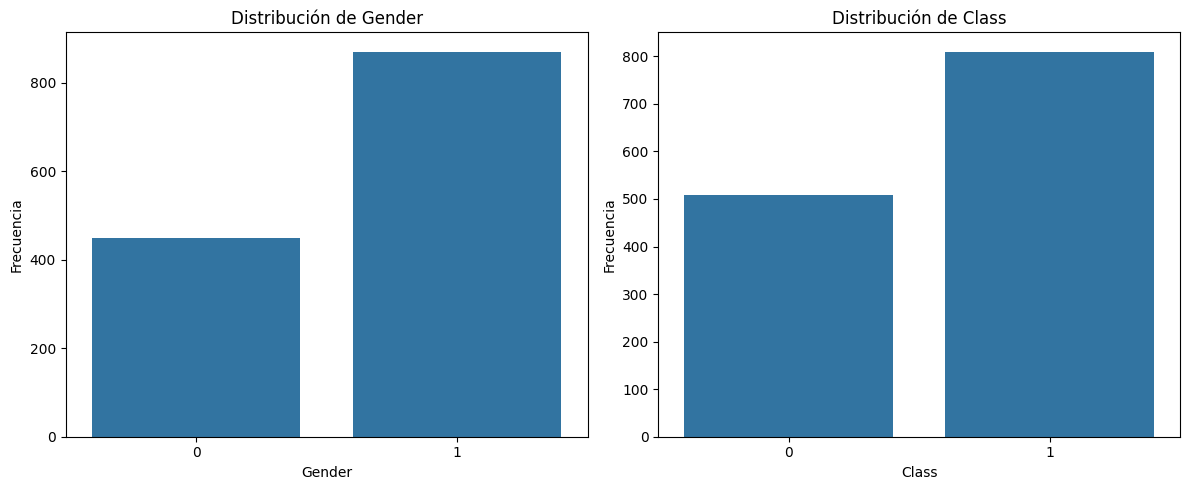

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gráfico de barras para 'gender'
sns.countplot(x='gender', data=df_heart, ax=axes[0])
axes[0].set_title('Distribución de Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frecuencia')

# Gráfico de barras para 'class'
sns.countplot(x='class', data=df_heart, ax=axes[1])
axes[1].set_title('Distribución de Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# Valores Atipicos

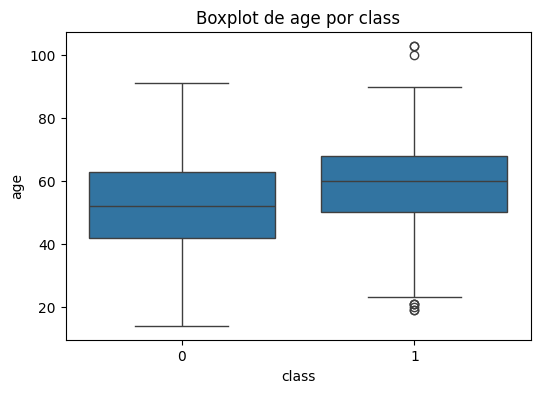

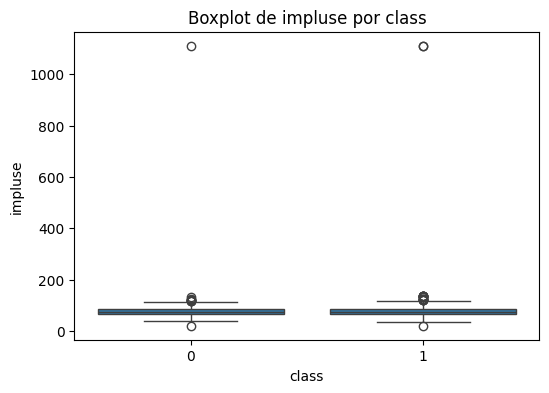

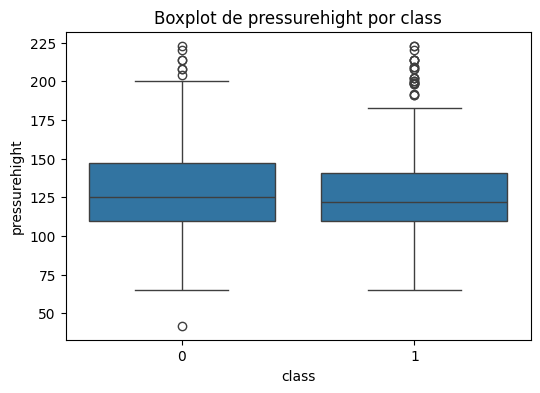

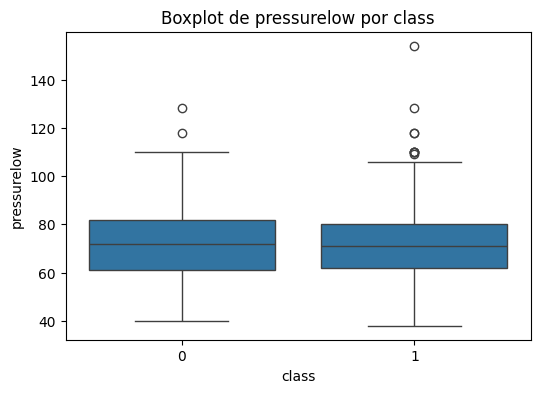

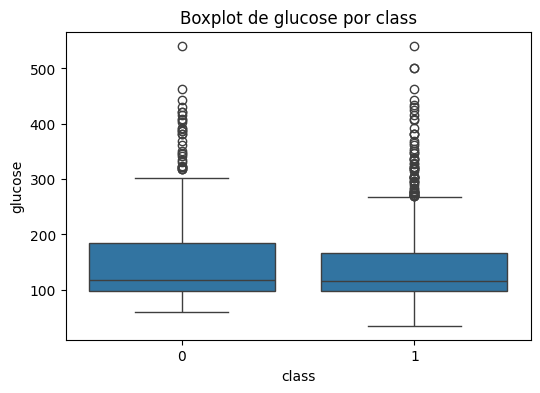

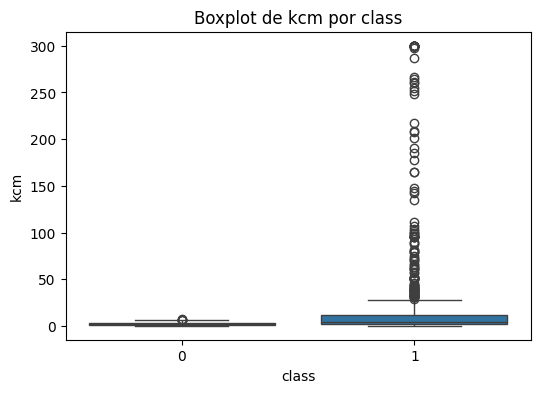

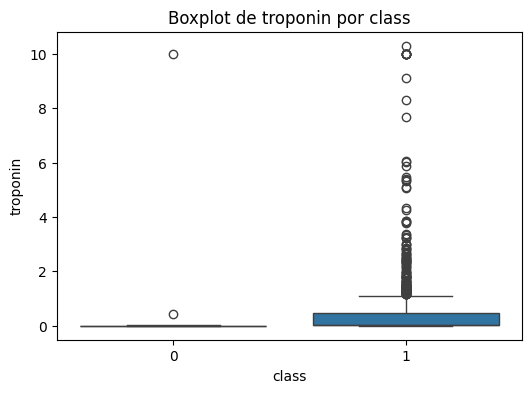

In [ ]:
numerical_columns = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
target = 'class'

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=X[column],data = df_heart)
    plt.xlabel(target)
    plt.ylabel(column)
    plt.title(f'Boxplot de {column} por class')
    plt.show()

* Age: Se observa alta dispersión con algunos outliers  que superar los valores maximo y minimos en la clase positivo

* Impluse: Se observa baja dispersión con algunos ourliers en ambas clases

* Pressurehight: Se observa alta dispersión, para la clase negativo se observa pocos outliers por debajo del valor minimo, y hay mas outliers que pasan el valor maximo, para la clase negativo solo se observa muchos outliers que superan el valos máximo

* Pressurelow: Se observa alta dispersión , se observa pocos outliers que supera el valor maximo de la clase negativo, miestras que la clase positivo tienen mas outliers que superan el valor maximo

* Glucosse: Se observa dispersión moderada , se oberva muchos outliers que superan tanto la clase negativo como la clase positivo en el valor máximo

* KCM: Se observa baja dispersión, con pocos outlieres sobre el maximo de la clase negativo y muchos outlieres superando el maximo de la clase positivo

* Troponin: Se observa baja dispersión con unos pocos outliers en la clase negativo, y muchos outliers en la clase positivo


# Correlación entre las variables

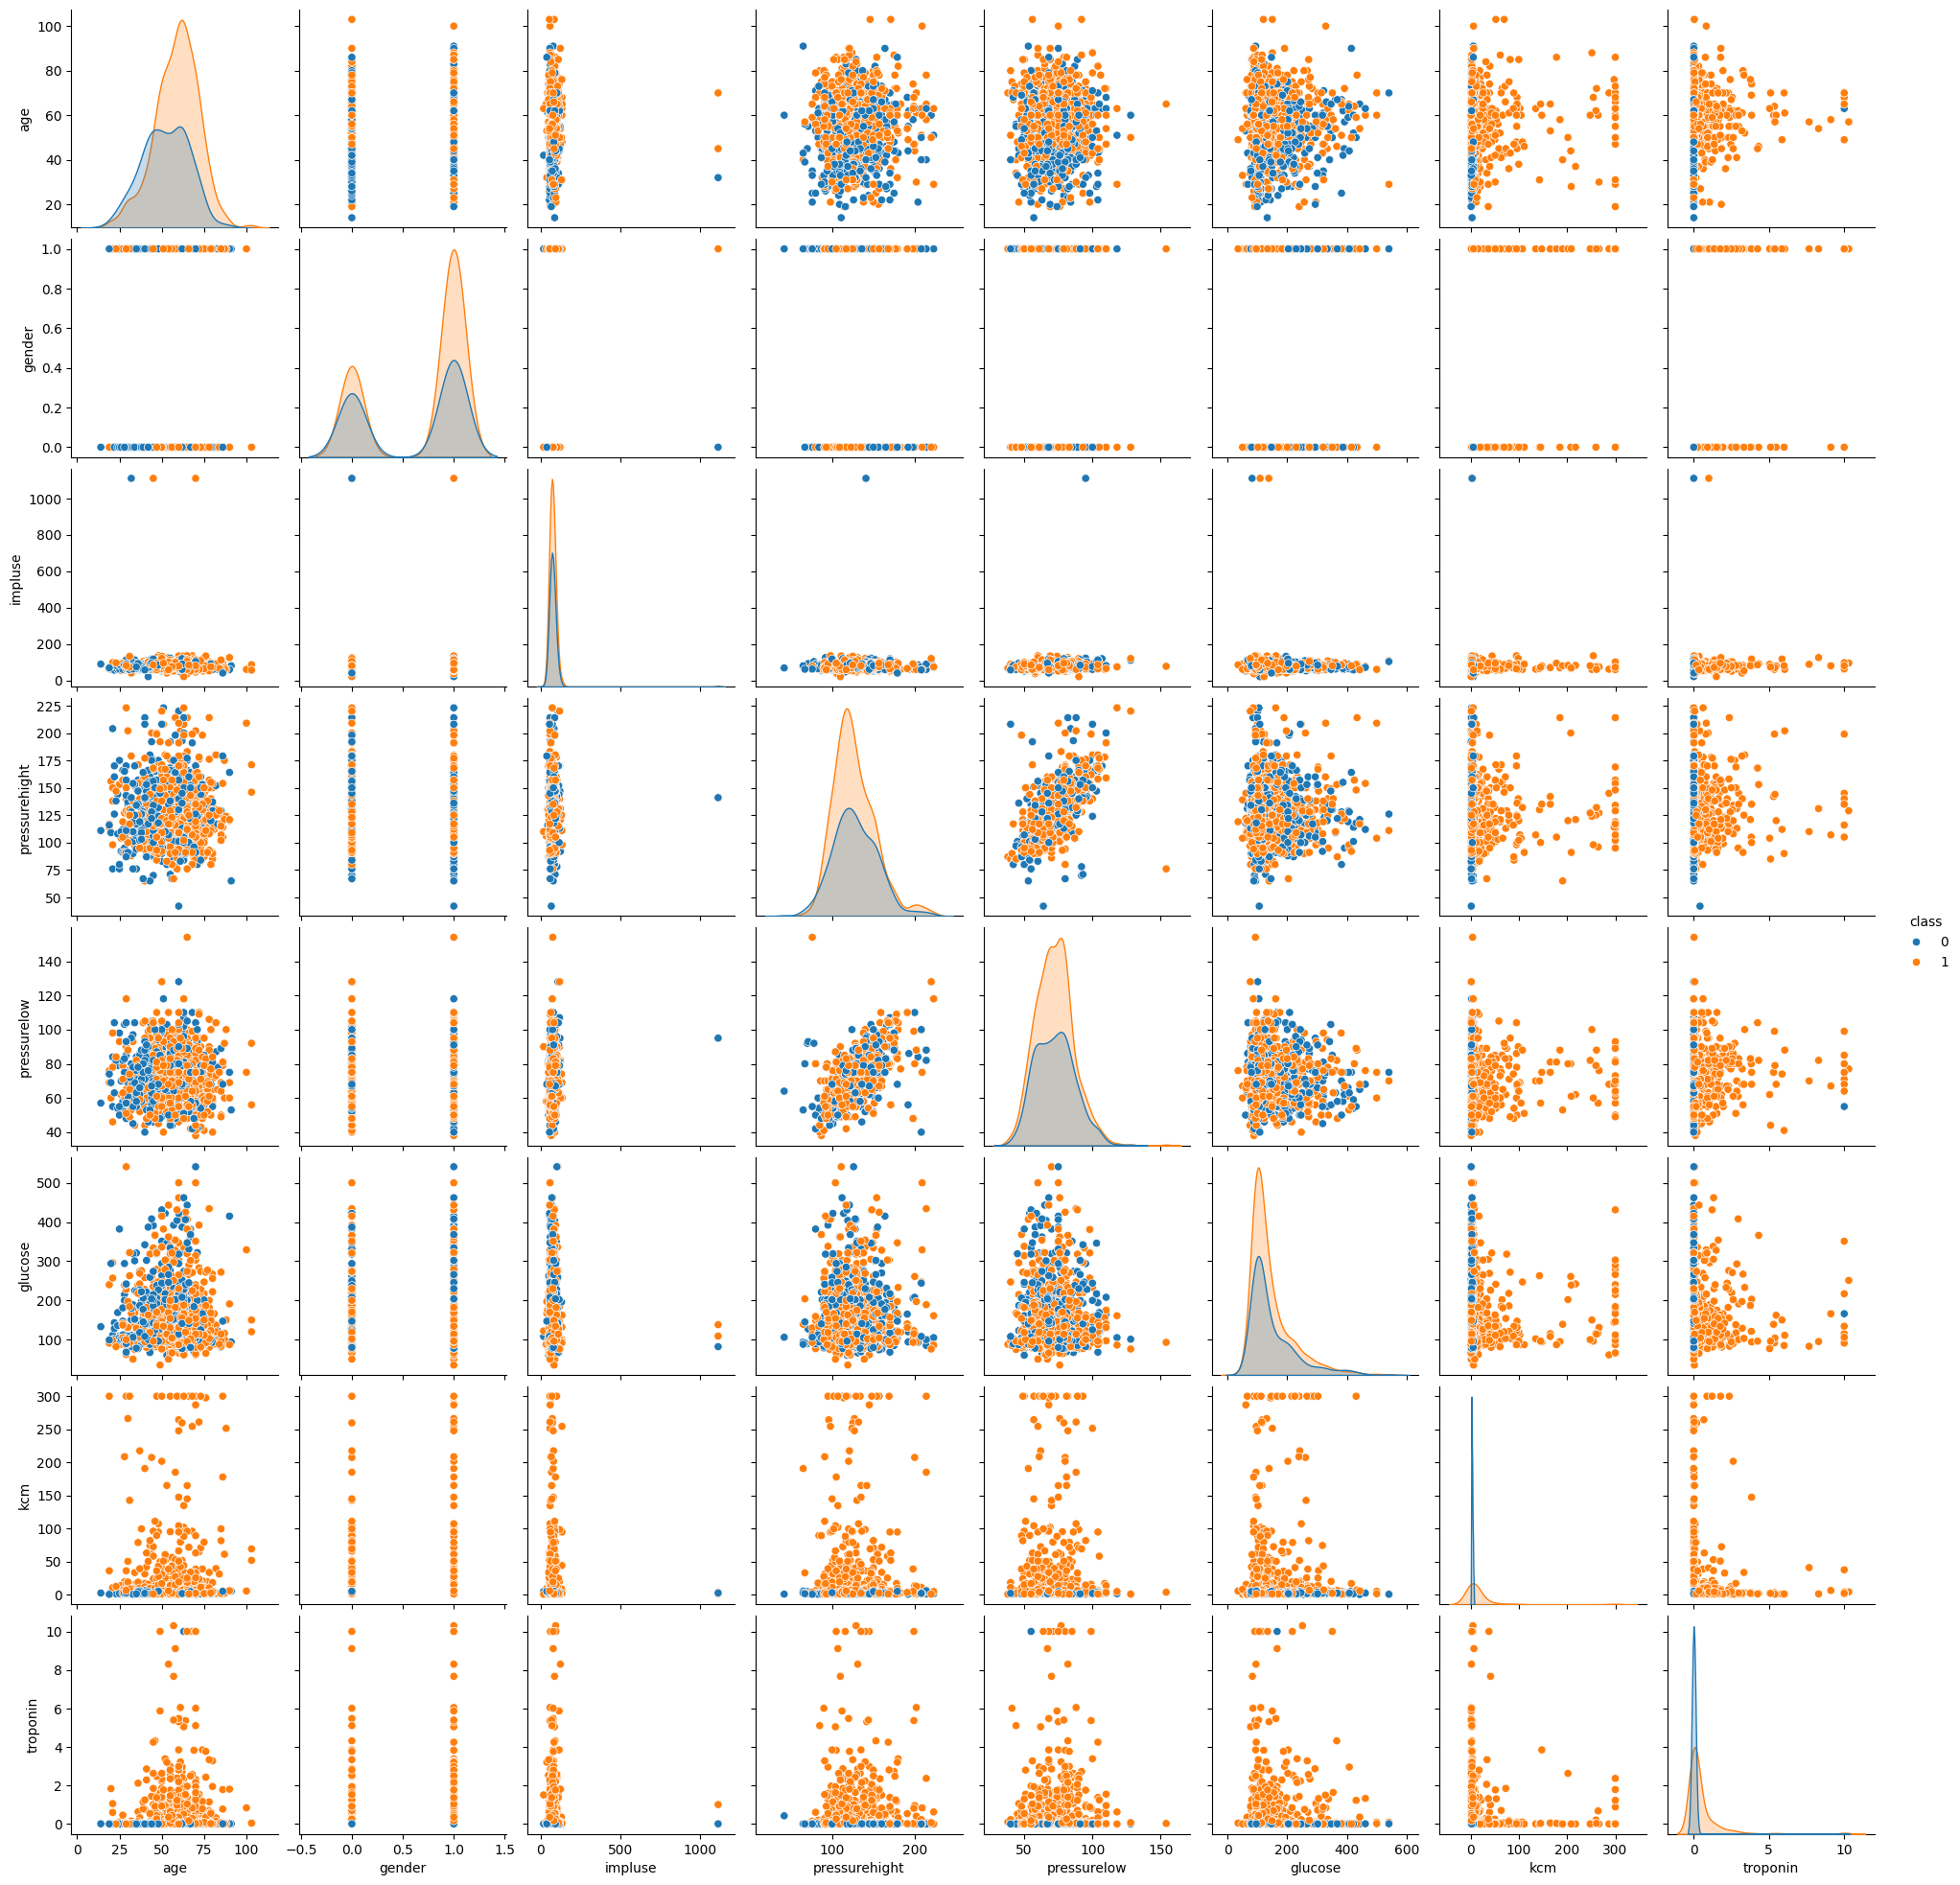

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_heart, hue='class')
plt.show()


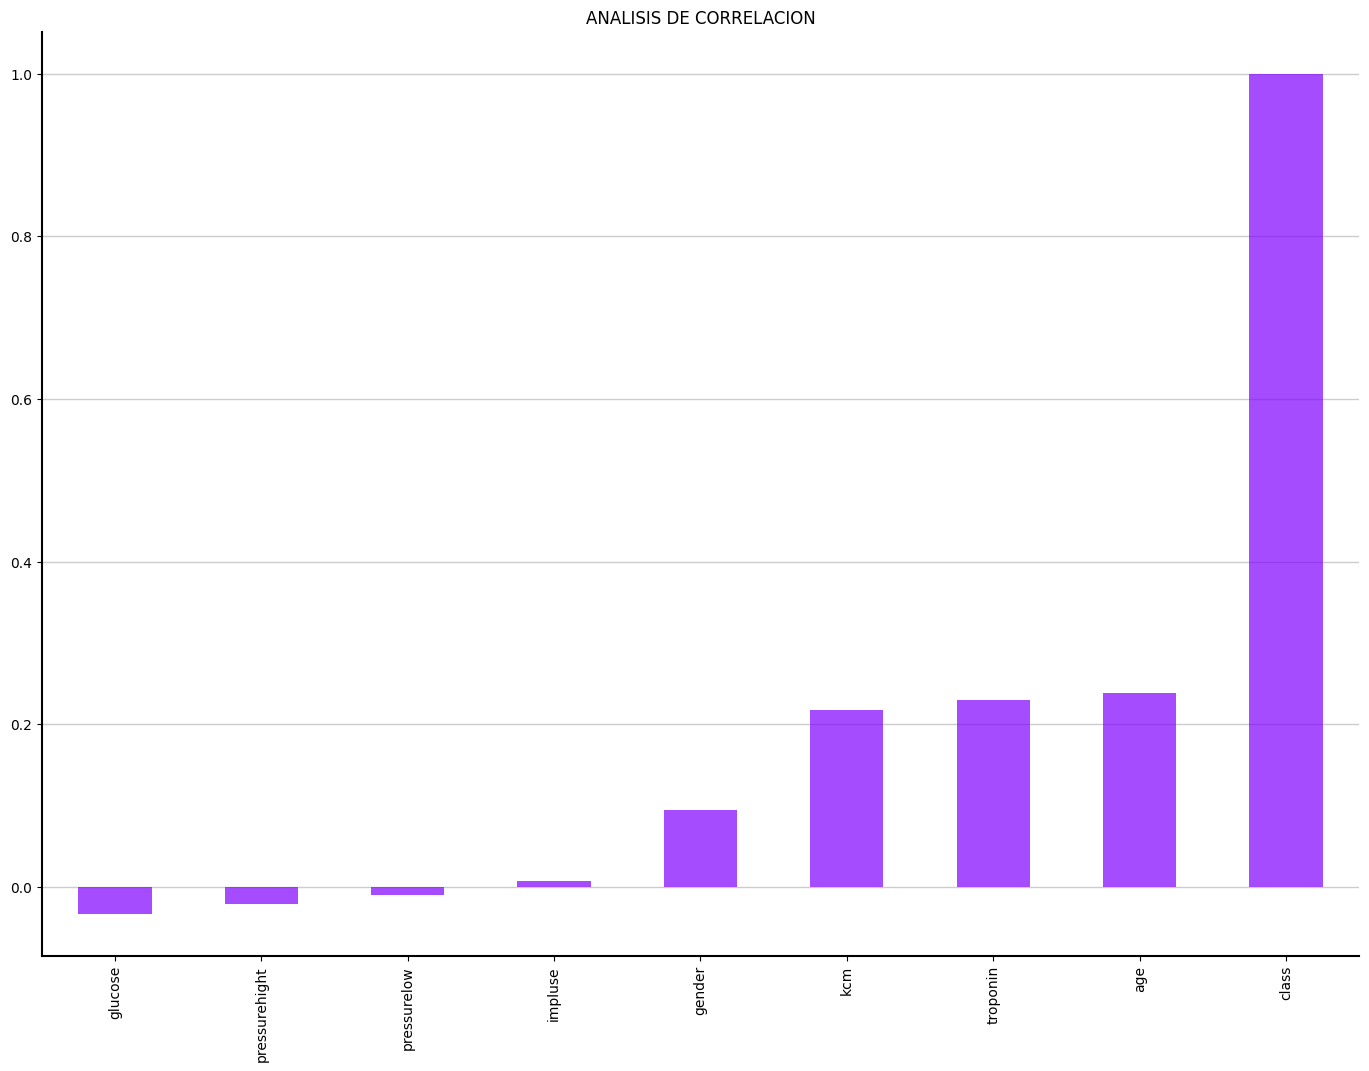

In [8]:
##Para ayudarnos mas, visualizaremos el coef. Pearson
fig, ax = plt.subplots(figsize=(17,12))
df_heart.corr()["class"].sort_values(ascending=True).plot(kind="bar",cmap="rainbow",alpha=0.7)
plt.title("ANALISIS DE CORRELACION")
for i in['bottom','left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray',linewidth=1,axis='y',alpha=0.4)
plt.show()

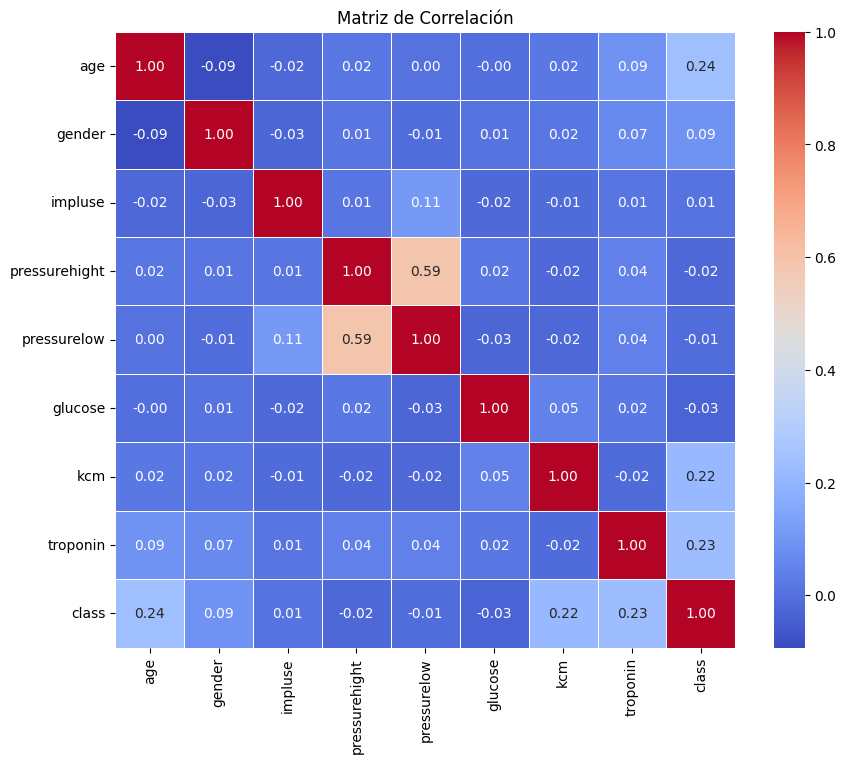

In [9]:
# Matriz de correlación
#correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

correlation_matrix = df_heart.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se realizo 3 gráficas diferentes para validar si hay correlación entre las variables y se llega a la conclusión d eque no hay correlación entre las variables , solo se observa una correlación minima entre las siguiente variables:

Pressurehight y Pressurelow

## Normalizacion

In [12]:
#Normalizamos

from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])
X_scaled


array([[ 5.72357956e-01, -2.39032215e-01,  1.25721470e+00, ...,
         1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.57963993e+00,  3.03491001e-01, -1.11709835e+00, ...,
         1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
       [-8.73625310e-02, -2.77783874e-01,  1.25721470e+00, ...,
         1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.20385295e-01,  1.29108539e-01,  1.56357767e+00, ...,
        -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60664807e-01, -3.94038849e-01, -3.89486287e-01, ...,
         3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80571637e-01,  3.03491001e-01,  1.14232858e+00, ...,
        -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]])

In [11]:
df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


# División de variables

In [13]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [14]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


# Aplicamos modelo de Regresión Logistica

##**Con todas las variables**



In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



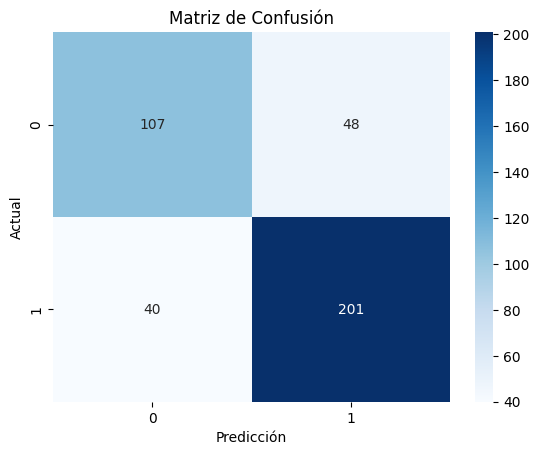

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Probando el modelo con todas las variables obtenemos:

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    Aunque el modelo tiene un accuracy del 77%, no es óptimo porque tiene
    muchos falsos negativos (40), es decir, no detecta ataques al corazón
    reales. Esto es grave porque esos pacientes podrían no recibir
    atención a tiempo. Además, tiene 48 falsos positivos, lo que genera
    falsas alarmas. Por eso, se debería mejorar el modelo para reducir los
    falsos negativos y aumentar la confiabilidad en la detección.



In [18]:
from sklearn.feature_selection import RFE

selector = RFE(LogisticRegression(), n_features_to_select=5)
selector = selector.fit(X, y)
print(X.columns[selector.support_])


Index(['age', 'glucose', 'kcm', 'troponin', 'gender'], dtype='object')


## **Probamos quitando la variable: pressurehight , que tuvo 0.59 como indice de correlación**

In [ ]:
#Normalizamos las variables sin presssurehigh
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.518166,2.047752,-0.306509,-0.310140,1


In [ ]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [ ]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.518166,2.047752,-0.306509,-0.310140,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.7803030303030303

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.84      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.77       396
weighted avg       0.78      0.78      0.78       396



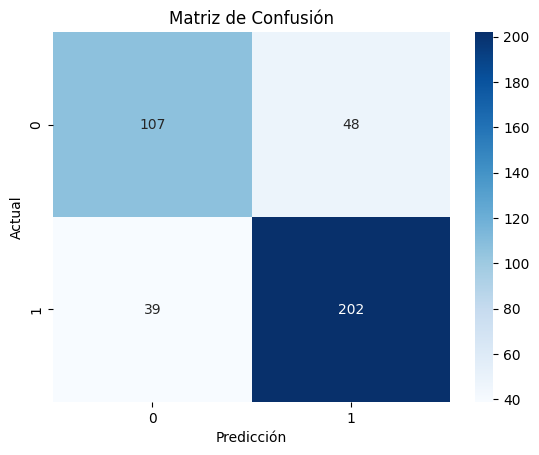

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Probando el modelo sin la variable pressurehigh:

Un accuracy de : 78%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 39 eran positivos y lo detecto como negativo

**Nota:**

    A diferencia del modelo anterior para este modelo , tenemos un
    accuracy de 78%, los falsos positivos se mantuvieron en 48, pero los
    falsos negativos se redujo en 1 a 39 pero aún asi nos parece un
    número muy alto para tomar en consideración a este modelo



## **Probamos quitando la variable: pressurelow , que tuvo 0.59 como indice de correlación**

In [ ]:
#Normalizamos las variables sin pressurelow
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()


,age,impluse,pressurehight,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,2.047752,-0.306509,-0.310140,1


In [ ]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [ ]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,pressurehight,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,2.047752,-0.306509,-0.310140,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.7803030303030303

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.77      0.77       396
weighted avg       0.78      0.78      0.78       396



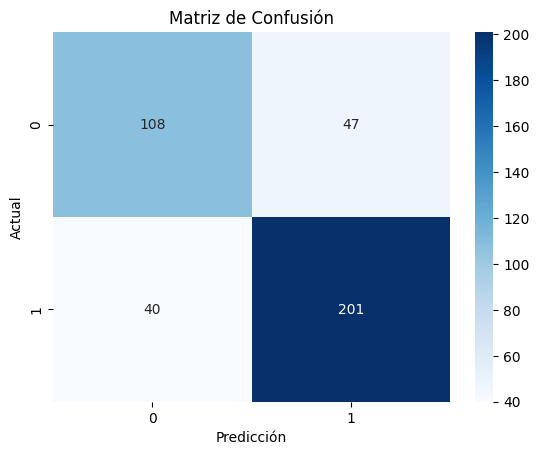

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Probando el modelo sin la variable pressurelow:

Un accuracy de : 78%
Mientras que la matriz de confusión nos indica:

* 47 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    En este caso para este modelo el accuracy aumento a 78%, pero los
    falsos negativos volvieron a 40 , mientras que los falsos positivos
    bajaron a 47, aún asi el modelo nos sigue pareciendo insuficiente para
    ser considerado en el modelo


## **Probamos quitando la variable: pressurelow y pressurehight , que tuvo 0.59 como indice de correlación**

In [ ]:
#Normalizamos las variables sin presssurehigh y pressurelow
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()


,age,impluse,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,2.047752,-0.306509,-0.310140,1


In [ ]:
# y es la variable dependiente
y = df_heart['class']
y.head()


,class
0,0
1,1
2,0
3,1
4,0


In [ ]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,2.047752,-0.306509,-0.310140,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.7878787878787878

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72       155
           1       0.82      0.84      0.83       241

    accuracy                           0.79       396
   macro avg       0.78      0.77      0.78       396
weighted avg       0.79      0.79      0.79       396



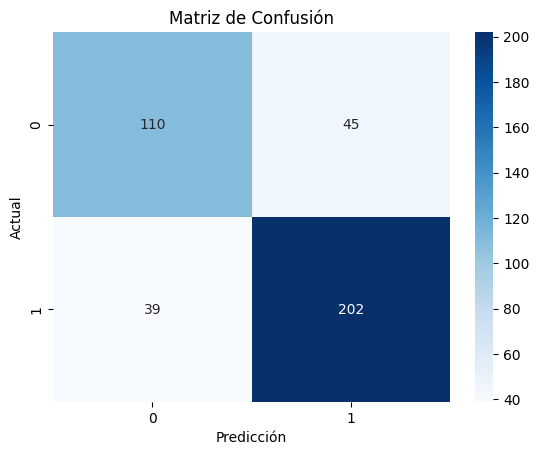

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Probando el modelo sin la variable pressurehigh y pressurelow:

Un accuracy de : 78%
Mientras que la matriz de confusión nos indica:

* 45 lo detecto como positivo pero eran negativos
* 39 eran positivos y lo detecto como negativo

**Nota:**

    Al igual que el modelo anterior mantenemos un accuracy de 78%, los
    falsos positivos se redujeron de 48 a 45, pero los falsos negativos se
    redujo de 40 a 39, aún asi nos parece un número muy alto para tomar en
    consideración a este modelo


## **Probamos quitando la variable impluse**


In [130]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [131]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [132]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [134]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



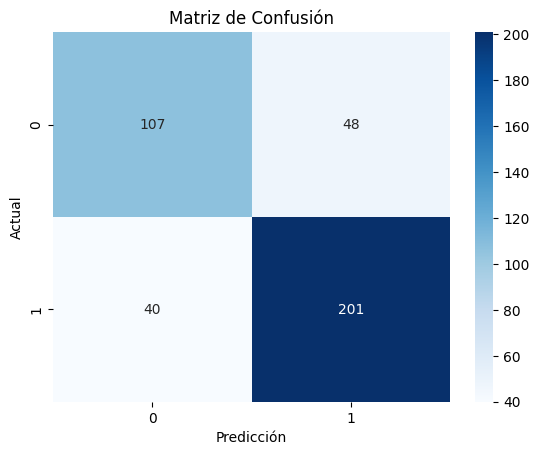

In [135]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Probando el modelo sin la variable impluse:

Un accuracy de : 78%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota: **

    Para este modelo tenemos un accuracy de 78%, los falsos positivos son 48, y los falsos negativos al igual que modelos anteriores su valor es de 39, aún quitando 3 variable los positivos que no detecta son muy altos


## **Probamos quitando la variable genero que como es categorica puede que esto este causando problemas en el modelo**

In [ ]:
#Normalizamos las variables sin presssurehigh
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)
df_scaled.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140


In [ ]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [ ]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



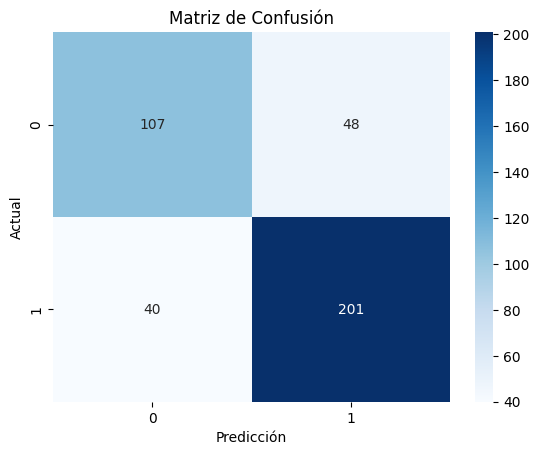

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Probando el modelo sin la variable gender:

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota: **

    Para este modelo tenemos un accuracy de 77%, manteniendo al igual que
    modelos anteriores falsos positivos de 44 y falsos negativos de 40, lo
    que nos hace llegar a pensar que este modelo no es muy optimo para
    ayudar a predecir si una persona puede sufrir ataques al corazon



# **Aplicamos modelo SVC**

## **Usando todas las variables**

In [ ]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [ ]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [ ]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [ ]:
#importamos la libreria
from sklearn import svm
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model_2=svm.SVC()

In [ ]:
result=model_2.fit(X_train, y_train)

In [ ]:
target_pred_2 = model.predict(X_test)
print(f'Recall Score (Falsos Negativos) :{recall_score(y_test,target_pred_2)}')
print(f'Accuracy Score (Fraccion que modelo realizó correct. ) :{accuracy_score(y_test,target_pred_2)}')
print(f'Precision Score (Falsos Positivos) :{precision_score(y_test,target_pred_2)}')

Recall Score (Falsos Negativos) :0.8340248962655602
Accuracy Score (Fraccion que modelo realizó correct. ) :0.7777777777777778
Precision Score (Falsos Positivos) :0.8072289156626506


Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



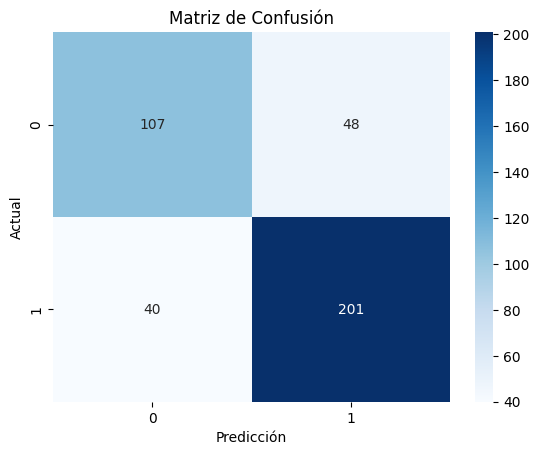

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


Probando SVC con todas las variables

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    Para el modelo SVC , mantenemos un accuracy de 77% y los falsos
    positivos en 48 y los falsos negativos en 40 ,

## **Quitando la variable pressurehight**

In [63]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

numerical_columns = ['age','impluse', 'pressurelow', 'glucose', 'kcm', 'troponin']

#scaler = StandardScaler()
scaler = RobustScaler()
X_scaled_rob = scaler.fit_transform(df_heart[numerical_columns])

df_scaled_rob = pd.DataFrame(X_scaled_rob, columns=numerical_columns , index=df_heart.index)

df_scaled_rob['gender'] = df_heart['gender']
df_scaled_rob.head()

,age,impluse,pressurelow,glucose,kcm,troponin,gender
0,0.333333,-0.380952,0.578947,0.615385,-0.253012,-0.025157,1
1,-2.055556,0.952381,-1.368421,2.517483,0.939759,13.157233,1
2,-0.166667,-0.476190,0.263158,2.153846,-0.207229,-0.138365,1
3,0.333333,-0.190476,-0.894737,2.153846,2.655422,1.358491,1
4,-0.166667,-0.476190,-0.368421,2.573427,-0.426506,-0.138365,1


In [64]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [65]:
#X = df_heart.drop('class', axis=1)
X = df_scaled_rob
X.head()

,age,impluse,pressurelow,glucose,kcm,troponin,gender
0,0.333333,-0.380952,0.578947,0.615385,-0.253012,-0.025157,1
1,-2.055556,0.952381,-1.368421,2.517483,0.939759,13.157233,1
2,-0.166667,-0.476190,0.263158,2.153846,-0.207229,-0.138365,1
3,0.333333,-0.190476,-0.894737,2.153846,2.655422,1.358491,1
4,-0.166667,-0.476190,-0.368421,2.573427,-0.426506,-0.138365,1


In [66]:
#importamos la libreria
from sklearn import svm
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
model_2=svm.SVC()

In [68]:
result=model_2.fit(X_train, y_train)

In [69]:
target_pred_2 = model.predict(X_test)
print(f'Recall Score (Falsos Negativos) :{recall_score(y_test,target_pred_2)}')
print(f'Accuracy Score (Fraccion que modelo realizó correct. ) :{accuracy_score(y_test,target_pred_2)}')
print(f'Precision Score (Falsos Positivos) :{precision_score(y_test,target_pred_2)}')

Recall Score (Falsos Negativos) :0.8340248962655602
Accuracy Score (Fraccion que modelo realizó correct. ) :0.7777777777777778
Precision Score (Falsos Positivos) :0.8072289156626506


Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



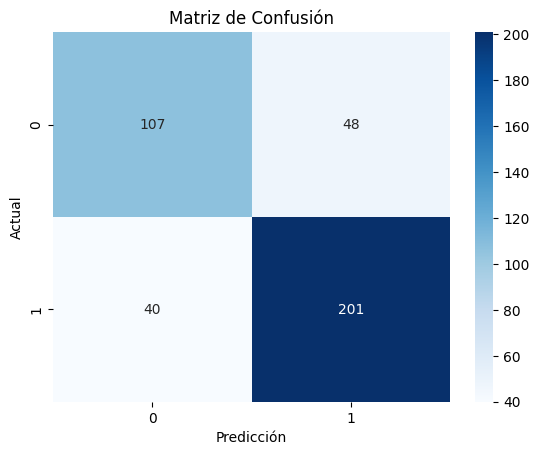

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

Probando SVC quitando pressurehigh

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    Para este modelo hicimos un cambio escalando las
    variables con rubuster escaler, pero el accuracy
    sigue siendo de 77% y los falsos negativos se
    mantienen en 40


## **Quitando la variable pressurelow**

In [95]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight',  'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled_mod2 = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()


,age,impluse,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,2.047752,-0.306509,-0.310140,1


In [96]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [97]:
#X = df_heart.drop('class', axis=1)
X = df_scaled_mod2
X.head()

,age,impluse,pressurehight,glucose,kcm,troponin
0,0.572358,-0.239032,1.257215,0.178459,-0.290962,-0.302342
1,-2.579640,0.303491,-1.117098,1.994344,-0.184072,0.605701
2,-0.087363,-0.277784,1.257215,1.647189,-0.286859,-0.310140
3,0.572358,-0.161529,-0.274600,1.647189,-0.030324,-0.207032
4,-0.087363,-0.277784,-0.580963,2.047752,-0.306509,-0.310140


In [98]:
#importamos la libreria
from sklearn import svm
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [99]:
model_2=svm.SVC()


In [100]:
result=model_2.fit(X_train, y_train)


In [101]:
target_pred_2 = model.predict(X_test)
print(f'Recall Score (Falsos Negativos) :{recall_score(y_test,target_pred_2)}')
print(f'Accuracy Score (Fraccion que modelo realizó correct. ) :{accuracy_score(y_test,target_pred_2)}')
print(f'Precision Score (Falsos Positivos) :{precision_score(y_test,target_pred_2)}')

Recall Score (Falsos Negativos) :0.8340248962655602
Accuracy Score (Fraccion que modelo realizó correct. ) :0.7777777777777778
Precision Score (Falsos Positivos) :0.8072289156626506


Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



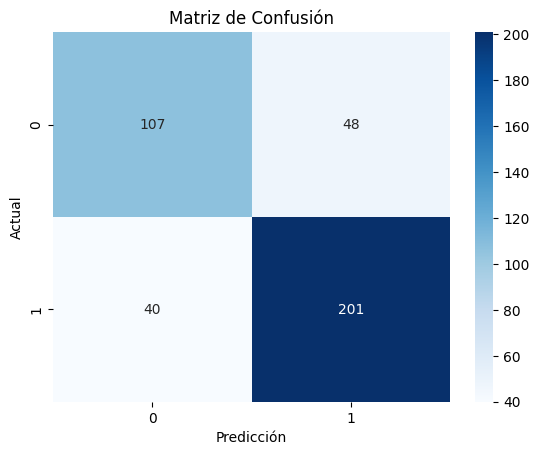

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


Probando SVC quitando pressurelow

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    Para este modelo el acurracy sigue siendo de 77% ,
    volvimos a escaler , y los falsos negativos son 40

## **Probamos quitando pressurehight y pressurelow**

In [103]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,2.047752,-0.306509,-0.310140,1


In [104]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [105]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,2.047752,-0.306509,-0.310140,1


In [106]:
#importamos la libreria
from sklearn import svm
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [107]:
model_2=svm.SVC()

In [108]:
result=model_2.fit(X_train, y_train)

In [109]:
target_pred_2 = model.predict(X_test)
print(f'Recall Score (Falsos Negativos) :{recall_score(y_test,target_pred_2)}')
print(f'Accuracy Score (Fraccion que modelo realizó correct. ) :{accuracy_score(y_test,target_pred_2)}')
print(f'Precision Score (Falsos Positivos) :{precision_score(y_test,target_pred_2)}')

Recall Score (Falsos Negativos) :0.8340248962655602
Accuracy Score (Fraccion que modelo realizó correct. ) :0.7777777777777778
Precision Score (Falsos Positivos) :0.8072289156626506


Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



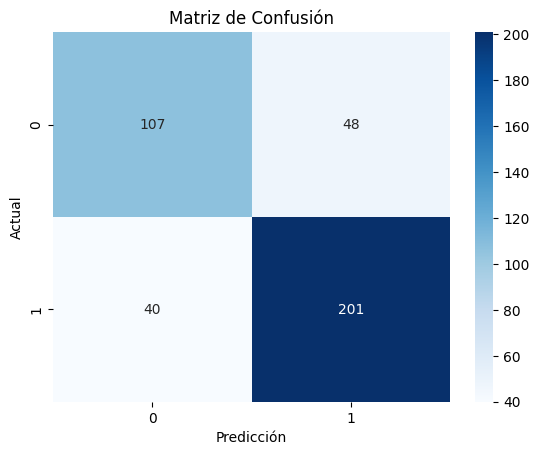

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


Probando SVC quitando pressurehigh pressurelow

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    Para este modelo el accuracy sigue siendo de 77% y
    los falsos negativos se mantienen en 40


## **Probamos quitando la variable genero**

In [112]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled.head()


,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140


In [113]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [114]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()


,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140


In [115]:
#importamos la libreria
from sklearn import svm
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [116]:
model_2=svm.SVC()

In [117]:
result=model_2.fit(X_train, y_train)

In [118]:
target_pred_2 = model.predict(X_test)
print(f'Recall Score (Falsos Negativos) :{recall_score(y_test,target_pred_2)}')
print(f'Accuracy Score (Fraccion que modelo realizó correct. ) :{accuracy_score(y_test,target_pred_2)}')
print(f'Precision Score (Falsos Positivos) :{precision_score(y_test,target_pred_2)}')

Recall Score (Falsos Negativos) :0.8340248962655602
Accuracy Score (Fraccion que modelo realizó correct. ) :0.7777777777777778
Precision Score (Falsos Positivos) :0.8072289156626506


Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



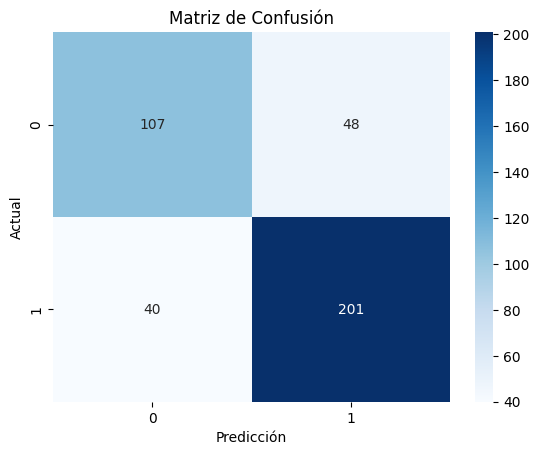

In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


Probando SVC quitando genero

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    Para este modelo el accuracy sigue siendo de 77% y
    los falsos negativos se mantienen en 40
    

## **Probamos quitando la variable impulse**

In [121]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [122]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [124]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [123]:
#importamos la libreria
from sklearn import svm
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [125]:
model_2=svm.SVC()

In [126]:
result=model_2.fit(X_train, y_train)

In [127]:
target_pred_2 = model.predict(X_test)
print(f'Recall Score (Falsos Negativos) :{recall_score(y_test,target_pred_2)}')
print(f'Accuracy Score (Fraccion que modelo realizó correct. ) :{accuracy_score(y_test,target_pred_2)}')
print(f'Precision Score (Falsos Positivos) :{precision_score(y_test,target_pred_2)}')

Recall Score (Falsos Negativos) :0.8340248962655602
Accuracy Score (Fraccion que modelo realizó correct. ) :0.7777777777777778
Precision Score (Falsos Positivos) :0.8072289156626506


Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       155
           1       0.81      0.83      0.82       241

    accuracy                           0.78       396
   macro avg       0.77      0.76      0.76       396
weighted avg       0.78      0.78      0.78       396



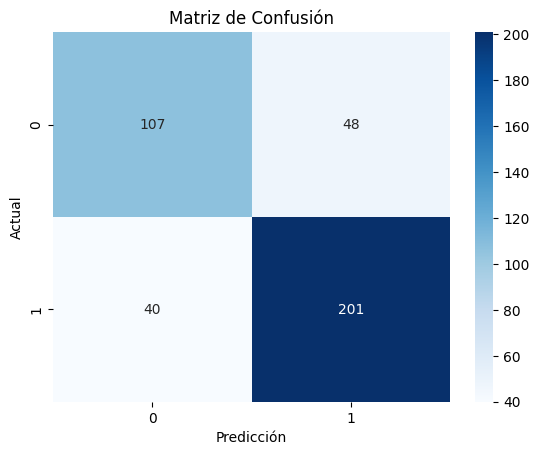

In [128]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


Probando SVC quitando impulse

Un accuracy de : 77%
Mientras que la matriz de confusión nos indica:

* 48 lo detecto como positivo pero eran negativos
* 40 eran positivos y lo detecto como negativo

**Nota:**

    Para este modelo el accuracy sigue siendo de 77% y
    los falsos negativos se mantienen en 40
    

# **Resultados**

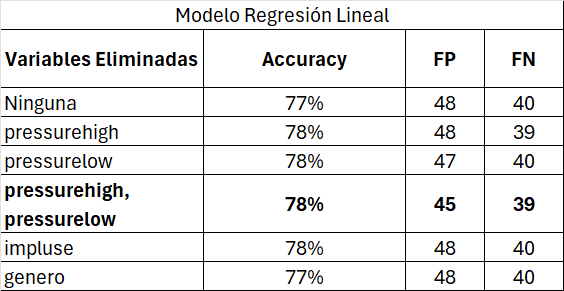

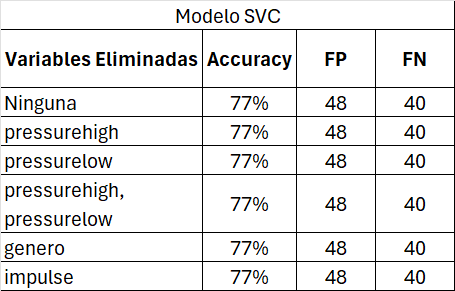

    Se hizo la comparativa de los 2 modelos que se
    probaron 6 veces quitando disitintas variables,
    como podemos observar en los cuadros anteriores
    para el modelo SVC nos da el mismo resultado para
    el acurracy , los FP y FN en cada interacción ,
    por lo cuál consideramos descartarlo.
    Para el modelo regresión logistica tenemos
    resultados muy parecidos, por minimmas
    diferencias , de entre los resultados elegimos el
    modelo en el cual quitamos las variables
    pressurehight y pressurelog que nos el accurracy
    mas alto , a pesar que otrs resultado tbm nos da
    un accuracy 78 , decidimos quedarnos con este dado
    si bien es cierto no hay mucha diferencia pero es
    el que menos FN(39) tiene
    

# **Probamos otro modelo: Bosque aleatorio**

## **Con todas las variables**

In [147]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [148]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [149]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()


,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


Accuracy: 0.9810606060606061

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       101
           1       0.99      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



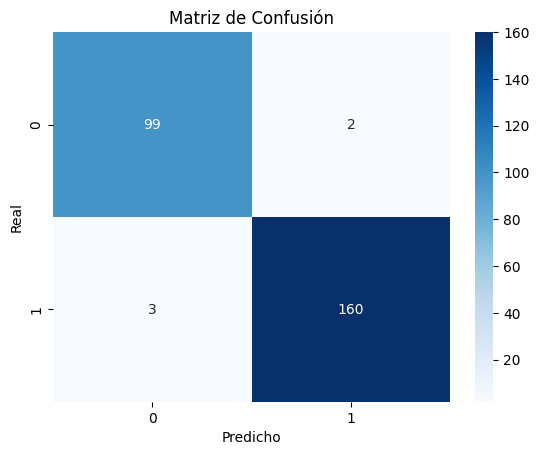

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamiento del árbol de decisión
#clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#clf.fit(X_train, y_train)


# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
#y_pred = clf.predict(X_test)
y_pred = rf.predict(X_test)


# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **Quitando pressurehight**

In [155]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.518166,2.047752,-0.306509,-0.310140,1


In [156]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [157]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.518166,2.047752,-0.306509,-0.310140,1


Accuracy: 0.9810606060606061

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



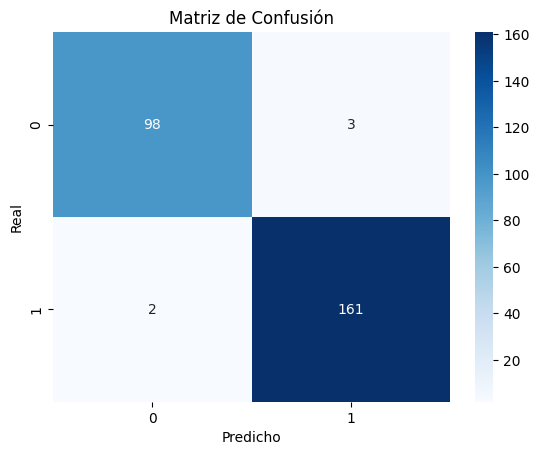

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamiento del árbol de decisión
#clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#clf.fit(X_train, y_train)

# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
#y_pred = clf.predict(X_test)
y_pred = rf.predict(X_test)


# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **Quitando la variable Pressurelow**

In [163]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,pressurehight,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,2.047752,-0.306509,-0.310140,1


In [164]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [165]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,pressurehight,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,2.047752,-0.306509,-0.310140,1


Accuracy: 0.9810606060606061

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



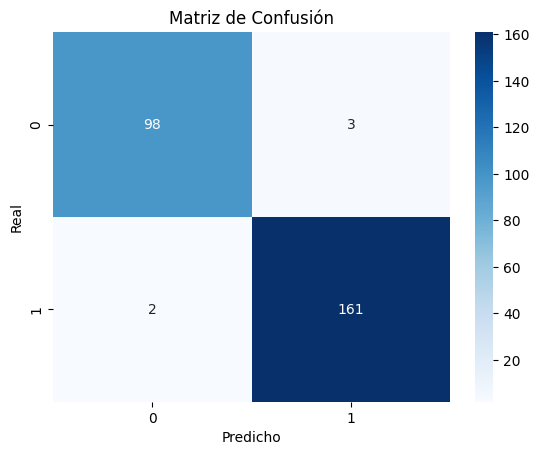

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamiento del árbol de decisión
#clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#clf.fit(X_train, y_train)


# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
#y_pred = clf.predict(X_test)
y_pred = rf.predict(X_test)


# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **Probando quitando pressurelow y pressurehight**

In [167]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse',  'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,impluse,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,2.047752,-0.306509,-0.310140,1


In [168]:
# y es la variable dependiente
y = df_heart['class']
y.head()

,class
0,0
1,1
2,0
3,1
4,0


In [169]:
#X = df_heart.drop('class', axis=1)
X = df_scaled
X.head()

,age,impluse,glucose,kcm,troponin,gender
0,0.572358,-0.239032,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,2.047752,-0.306509,-0.310140,1


Accuracy: 0.9810606060606061

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



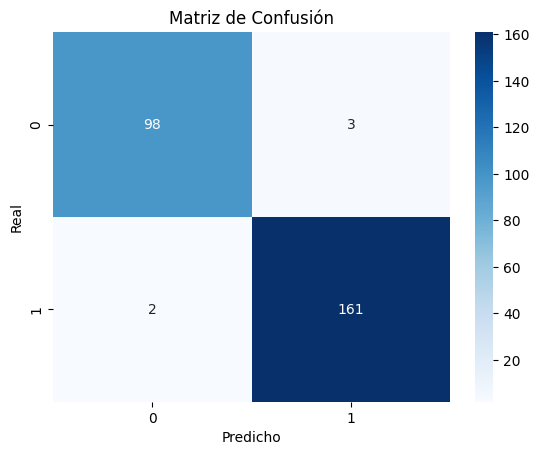

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamiento del árbol de decisión
#clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#clf.fit(X_train, y_train)


# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
#y_pred = clf.predict(X_test)
y_pred = rf.predict(X_test)


# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **Probamos quitando impulse**

In [173]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()

,age,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [174]:

# y es la variable dependiente
y = df_heart['class']
print(y.head())


#X = df_heart.drop('class', axis=1)
X = df_scaled
print(X.head())


0    0
1    1
2    0
3    1
4    0
Name: class, dtype: int64
        age  pressurehight  pressurelow   glucose       kcm  troponin  gender
0  0.572358       1.257215     0.764927  0.178459 -0.290962 -0.302342       1
1 -2.579640      -1.117098    -1.872542  1.994344 -0.184072  0.605701       1
2 -0.087363       1.257215     0.337229  1.647189 -0.286859 -0.310140       1
3  0.572358      -0.274600    -1.230995  1.647189 -0.030324 -0.207032       1
4 -0.087363      -0.580963    -0.518166  2.047752 -0.306509 -0.310140       1


Accuracy: 0.9810606060606061

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



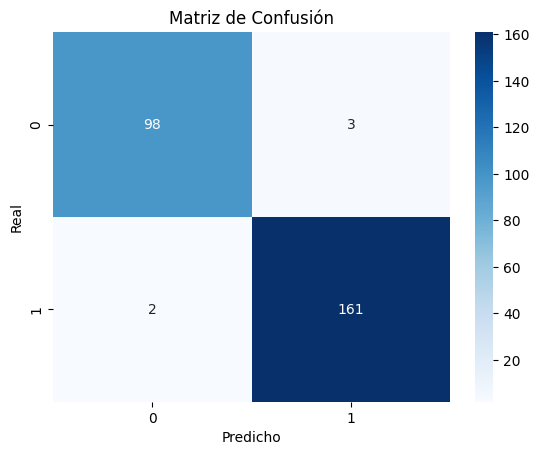

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamiento del árbol de decisión
#clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#clf.fit(X_train, y_train)


# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
#y_pred = clf.predict(X_test)
y_pred = rf.predict(X_test)


# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## **Probamos quitando la variable genero**

In [176]:
#Normalizamos las variables
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age','impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart[numerical_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numerical_columns , index=df_heart.index)

df_scaled['gender'] = df_heart['gender']
df_scaled.head()


,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,gender
0,0.572358,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,1
1,-2.579640,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,1
2,-0.087363,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,1
3,0.572358,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,1
4,-0.087363,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,1


In [177]:
# y es la variable dependiente
y = df_heart['class']
print(y.head())


#X = df_heart.drop('class', axis=1)
X = df_scaled
print(X.head())

0    0
1    1
2    0
3    1
4    0
Name: class, dtype: int64
        age   impluse  pressurehight  pressurelow   glucose       kcm  \
0  0.572358 -0.239032       1.257215     0.764927  0.178459 -0.290962   
1 -2.579640  0.303491      -1.117098    -1.872542  1.994344 -0.184072   
2 -0.087363 -0.277784       1.257215     0.337229  1.647189 -0.286859   
3  0.572358 -0.161529      -0.274600    -1.230995  1.647189 -0.030324   
4 -0.087363 -0.277784      -0.580963    -0.518166  2.047752 -0.306509   

   troponin  gender  
0 -0.302342       1  
1  0.605701       1  
2 -0.310140       1  
3 -0.207032       1  
4 -0.310140       1  


Accuracy: 0.9810606060606061

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       101
           1       0.99      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



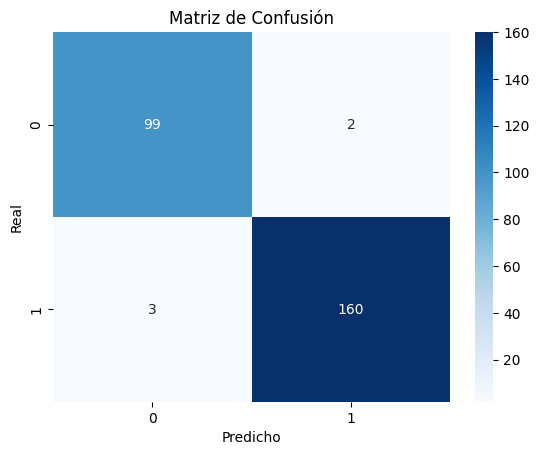

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamiento del árbol de decisión
#clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#clf.fit(X_train, y_train)


# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
#y_pred = clf.predict(X_test)
y_pred = rf.predict(X_test)


# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


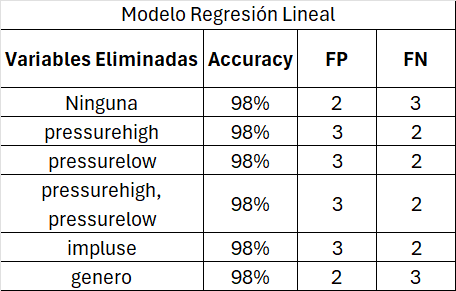

# Resumen

Si tomamos en consideración solo los modelos aprendidos
en clase nos quedmos con el modelo ya mencionado
pero si queremos ir poco mas allá, investigando encontramos el modelo randomforest que nos brinda un mayo accuracy , dado que no hay mucha diferencia entre los 6 modelos , podriamos optar por quedarnos con el modelo con todas las variables que nos da un accuracy de 98% y los FP son 2 y los FN son 3